# This  project is based on kaggle's titanic dataset for data exploration,data cleanig and visualization. 


#In the end of the project we'll be looking at the correlation matrix of all columns.

In [47]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
from sklearn.impute import SimpleImputer
import plotly.express as px
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [44]:
#import the dataset 
data=pd.read_csv("E:/New folder (3)/exam/train11.csv")

In [3]:
#Lets look at the data

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#looking for Null values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

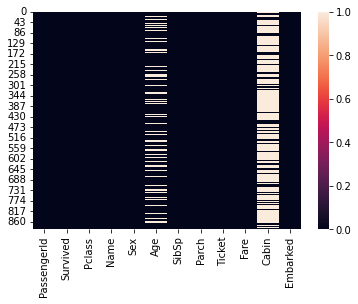

In [7]:
#As we can see there are some missing values in ["Age "] and ["cabin"].
#Now lets visualize  the missing values
sn.heatmap(data.isna())

In [8]:
#Taking care of mising values in ["age"]
#Naively we can just drop all NA but we'll be faceing lots of data lose.
#Lets fill the NA with mean value of ["Age"]
data["Age"].fillna(data['Age'].mean(),inplace=True)



In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#By my biased opinion,I dont think cabin column will do any good for our visualization.So we we will be droping that colunm
data=data.drop(columns=['Cabin'],axis=1)

In [11]:

data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
#checking for missing values in row
data[data.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [13]:
data.groupby('Pclass')["Embarked"].value_counts()

Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64

In [14]:
impute=SimpleImputer(strategy="most_frequent")
data[["Embarked"]]=impute.fit_transform(data[["Embarked"]])

In [15]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
le=LabelEncoder()
labelSex=le.fit_transform(data['Sex'])
labelEmbrk=le.fit_transform(data['Embarked'])

In [18]:
data["Gennder"]=labelSex
data["EmbarkedEncoded"]=labelEmbrk

In [19]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gennder,EmbarkedEncoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,0


In [20]:
data=data.drop(columns=['Sex'],axis=1)
data=data.drop(columns=['Embarked'],axis=1)

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Gennder,EmbarkedEncoded
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,2


In [22]:
#lets get rid of the float values in ["Age"]
data['Age']=data['Age'].astype('int64')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Age              891 non-null    int64  
 5   SibSp            891 non-null    int64  
 6   Parch            891 non-null    int64  
 7   Ticket           891 non-null    object 
 8   Fare             891 non-null    float64
 9   Gennder          891 non-null    int32  
 10  EmbarkedEncoded  891 non-null    int32  
dtypes: float64(1), int32(2), int64(6), object(2)
memory usage: 69.7+ KB


In [24]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Gennder,EmbarkedEncoded
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,1,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27,0,0,211536,13.0000,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",19,0,0,112053,30.0000,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29,1,2,W./C. 6607,23.4500,0,2
889,890,1,1,"Behr, Mr. Karl Howell",26,0,0,111369,30.0000,1,0


In [25]:
#lets get rid of the Name column
data=data.drop(columns=['Name'],axis=1)

In [26]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Gennder,EmbarkedEncoded
0,1,0,3,22,1,0,A/5 21171,7.2500,1,2
1,2,1,1,38,1,0,PC 17599,71.2833,0,0
2,3,1,3,26,0,0,STON/O2. 3101282,7.9250,0,2
3,4,1,1,35,1,0,113803,53.1000,0,2
4,5,0,3,35,0,0,373450,8.0500,1,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27,0,0,211536,13.0000,1,2
887,888,1,1,19,0,0,112053,30.0000,0,2
888,889,0,3,29,1,2,W./C. 6607,23.4500,0,2
889,890,1,1,26,0,0,111369,30.0000,1,0


# VISUALIZATION

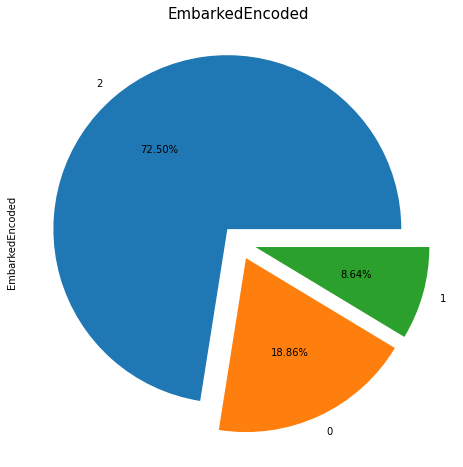

In [27]:
data["EmbarkedEncoded"].value_counts().plot.pie(figsize=(12,8),explode=(0.1,0.1,0.1),autopct="%1.2f%%")
plt.title("EmbarkedEncoded",fontsize=15)
plt.show()

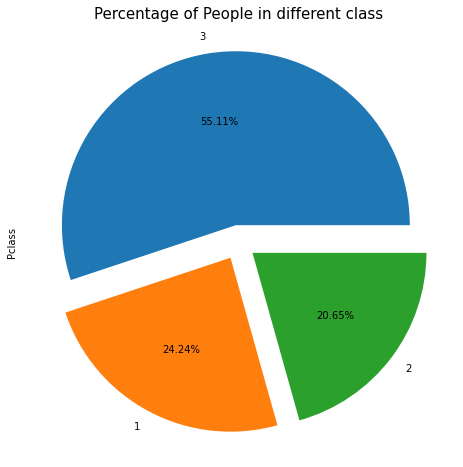

In [28]:
data["Pclass"].value_counts().plot.pie(figsize=(12,8),explode=(0.1,0.1,0.1),autopct="%1.2f%%")
plt.title("Percentage of People in different class",fontsize=15)
plt.show()

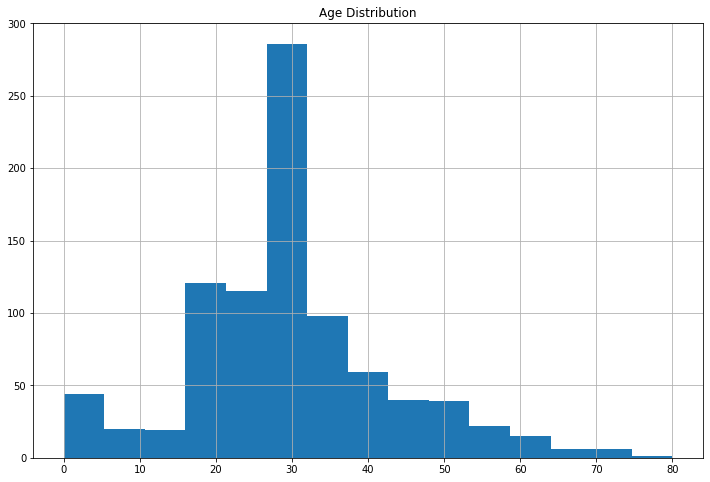

In [29]:
data["Age"].hist(figsize=(12,8),bins=15)
plt.title("Age Distribution")
plt.show()

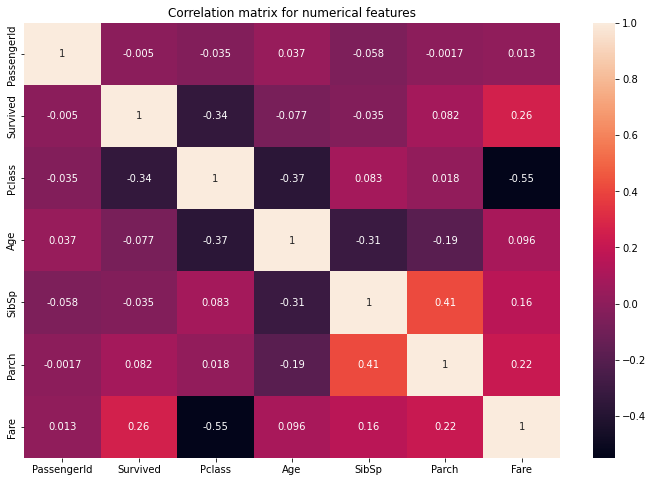

In [48]:
sn.heatmap(data.corr(),annot=True)
plt.title('Correlation matrix for numerical features')
plt.show()